In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import rasterio
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
import time

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [17]:
merged_df = pd.read_csv('D:/Dissertation/new_dataset/newmerged_final.csv')

In [18]:
newmerged_df = merged_df[(merged_df['temp'] >= 140) & (merged_df['temp'] <= 220)]

In [19]:
newmerged_df.head()

,temp,chi2temp,pres0,taudust,tauice,dustuncert,iceuncert,chi2a,prum,wateruncert,...,icegood,watergood,tempgood,tsurfgood,latitude,longitude,kinetic_temp,kinetic_temp_uncertainty,kinetic_temp_wave,Altitude
0,181.101207,1.445642,5.895263,0.055455,0.021338,0.083618,0.020568,1.122247,0.000000,0.000000,...,2.0,0.0,1.0,1.0,-19.877602,-4.079770,189.205215,0.822708,896.827576,-115
1,183.849747,1.726828,5.838251,0.073615,0.043245,0.063332,0.026708,0.987953,3.254443,1.627222,...,2.0,0.0,1.0,1.0,-13.376220,5.113299,188.313416,0.814987,896.827576,151
2,182.333672,1.197351,6.003143,0.116109,0.139281,0.072234,0.372452,0.998192,16.282125,8.141063,...,0.0,0.0,1.0,1.0,-6.549092,8.923509,188.245056,0.814407,896.827576,-346
3,183.260913,1.214093,6.157167,0.275935,0.203291,0.068215,0.082735,0.797583,2.707390,1.353695,...,0.0,0.0,1.0,1.0,0.507753,10.150764,182.917801,0.769012,896.827576,-746
4,184.917702,2.049530,6.324225,0.101865,0.025172,0.030639,0.113667,0.711969,14.560339,7.280170,...,0.0,0.0,1.0,1.0,7.958702,9.053233,180.825272,0.751526,896.827576,-790


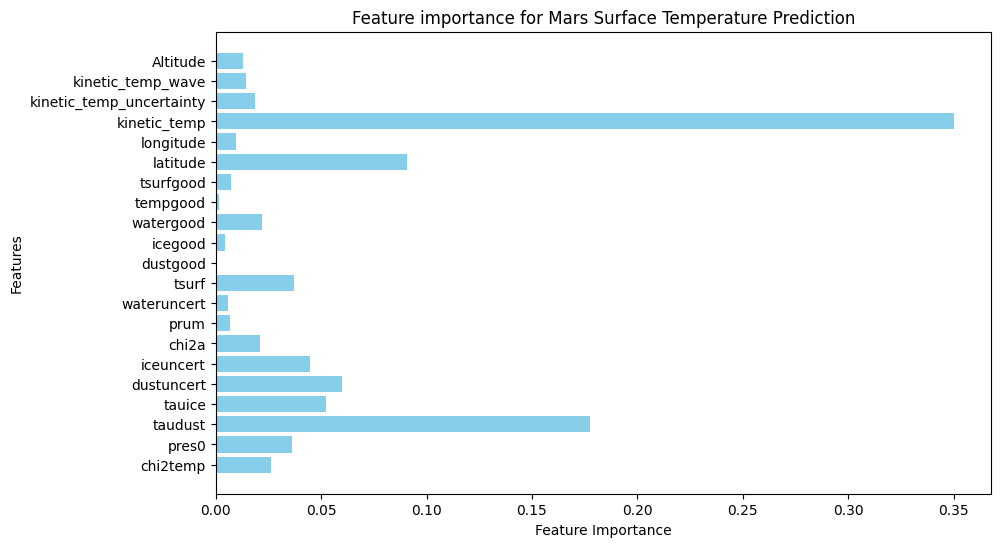

Selected Important Features: Index(['taudust', 'tauice', 'dustuncert', 'latitude', 'kinetic_temp'], dtype='object')


In [6]:
X = newmerged_df.copy().drop('temp', axis = 1)
Y = newmerged_df['temp'].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

RF_fselectmodel = RandomForestRegressor(n_estimators=100, random_state=42)

RF_fselectmodel.fit(X_train, Y_train)

importances = RF_fselectmodel.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature importance for Mars Surface Temperature Prediction')
plt.show()

important_features = feature_names[importances > np.mean(importances)]

print("Selected Important Features:", important_features)

In [20]:
newmerged_df = newmerged_df.drop(columns=['longitude', 'prum', 'iceuncert', 'dustgood', 'icegood',
                                          'watergood', 'tempgood', 'tsurfgood', 'kinetic_temp_uncertainty', 'kinetic_temp_wave', 'wateruncert'])

In [27]:
print(newmerged_df.head())

         temp  chi2temp     pres0   taudust    tauice  dustuncert     chi2a  \
0  181.101207  1.445642  5.895263  0.055455  0.021338    0.083618  1.122247   
1  183.849747  1.726828  5.838251  0.073615  0.043245    0.063332  0.987953   
2  182.333672  1.197351  6.003143  0.116109  0.139281    0.072234  0.998192   
3  183.260913  1.214093  6.157167  0.275935  0.203291    0.068215  0.797583   
4  184.917702  2.049530  6.324225  0.101865  0.025172    0.030639  0.711969   

        tsurf   latitude  kinetic_temp  Altitude  
0  192.662121 -19.877602    189.205215      -115  
1  191.966243 -13.376220    188.313416       151  
2  188.109365  -6.549092    188.245056      -346  
3  176.858012   0.507753    182.917801      -746  
4  179.669116   7.958702    180.825272      -790  


In [28]:
x = newmerged_df.copy().drop('temp', axis = 1)
y = newmerged_df['temp'].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Training time: 0.66 seconds
Prediction time: 0.0130 seconds
Total time taken: 0.6712 seconds
LR Mean Absolute Error: 7.898678069521821
LR Root Mean Squared Error: 9.84879131531719
LR Mean Squared Error: 96.9986903726673
LR R-squared score: 0.29969355019972743
       Actual   Predicted
0  177.246940  178.011793
1  197.321888  185.641433
2  192.142049  179.582386
3  183.239948  179.003720
4  187.367913  184.497971


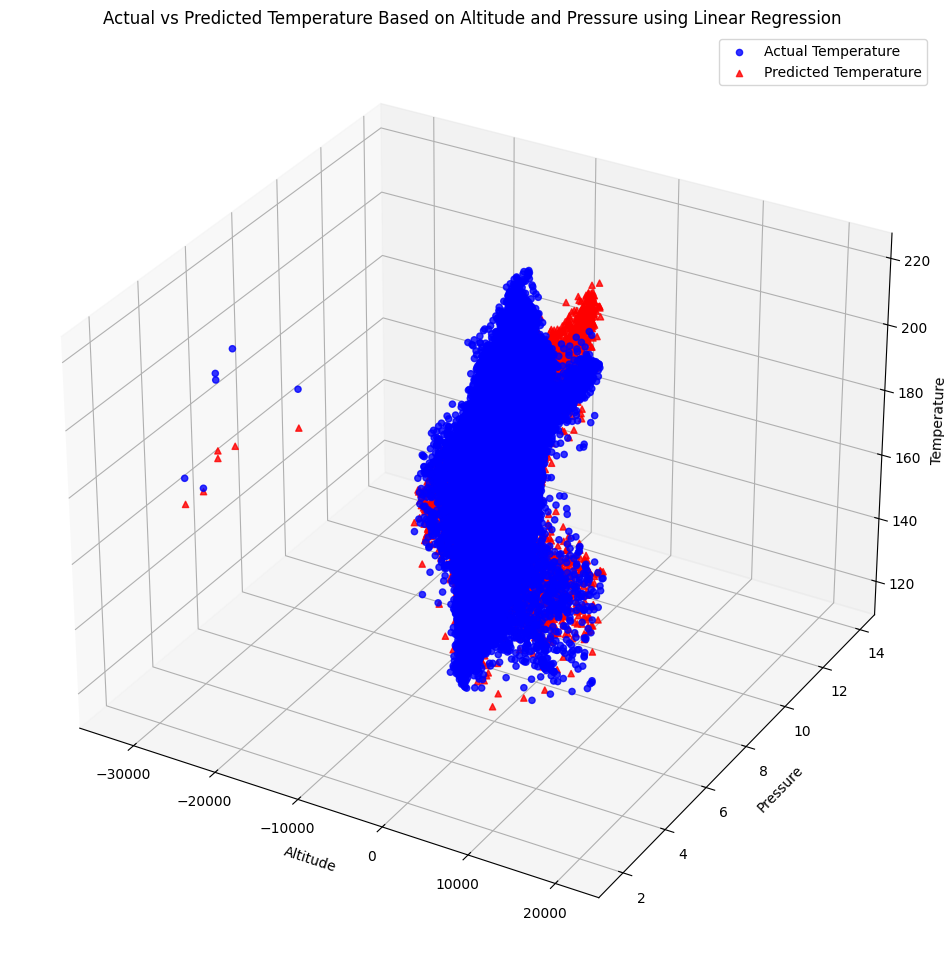

In [30]:
LRmodel = LinearRegression()

start_time = time.time()
LRmodel.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

start_time = time.time()
y_pred_LR = LRmodel.predict(x_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.4f} seconds")

LRtimetaken = training_time + prediction_time
print(f"Total time taken: {LRtimetaken:.4f} seconds")

lrmse = mean_squared_error(y_test, y_pred_LR)
lrrmse = np.sqrt(lrmse)
lrr2 = r2_score(y_test, y_pred_LR)
lrmae = mean_absolute_error(y_test, y_pred_LR)

print(f'LR Mean Absolute Error: {lrmae}')
print(f'LR Root Mean Squared Error: {lrrmse}')
print(f"LR Mean Squared Error: {lrmse}")
print(f"LR R-squared score: {lrr2}")

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_LR})
print(comparison.head())

fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_test['Altitude'], x_test['pres0'], y_test, color='blue', alpha= 0.8, label='Actual Temperature')
ax.scatter(x_test['Altitude'], x_test['pres0'], y_pred_LR, color='red', alpha=0.8, label='Predicted Temperature', marker='^')

ax.set_xlabel('Altitude')
ax.set_ylabel('Pressure')
ax.set_zlabel('Temperature')

ax.set_title('Actual vs Predicted Temperature Based on Altitude and Pressure using Linear Regression')
ax.legend()

plt.show()

Training time: 2.05 seconds
Prediction time: 13.3631 seconds
Total time taken: 15.4175 seconds
KNN Mean Squared Error: 74.01044922870811
KNN Root Mean Squared Error: 8.602932594685845
KNN Mean Absolute Error: 6.705991747142217
KNN R squared score: 0.4656629409288935
       Actual   Predicted
0  177.246940  179.937621
1  197.321888  181.776948
2  192.142049  191.267794
3  183.239948  179.849375
4  187.367913  188.608518


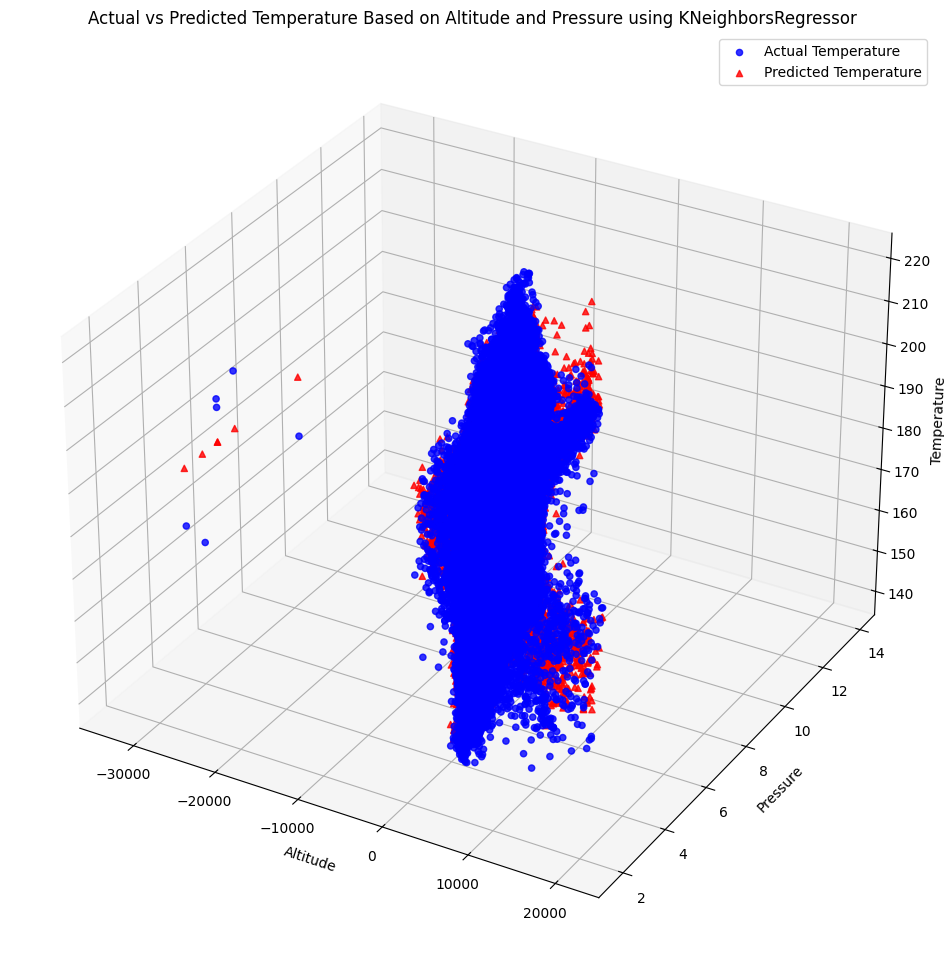

In [31]:
KNN = KNeighborsRegressor(n_neighbors=5)

start_time = time.time()
KNN.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

start_time = time.time()
y_pred_KNN = KNN.predict(x_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.4f} seconds")

KNNtimetaken = training_time + prediction_time
print(f"Total time taken: {KNNtimetaken:.4f} seconds")

knnmse = mean_squared_error(y_test, y_pred_KNN)
print(f"KNN Mean Squared Error: {knnmse}")

knnrmse = np.sqrt(knnmse)
print(f'KNN Root Mean Squared Error: {knnrmse}')

knnmae = mean_absolute_error(y_test, y_pred_KNN)
print(f'KNN Mean Absolute Error: {knnmae}')

knnr2 = r2_score(y_test, y_pred_KNN)
print(f"KNN R squared score: {knnr2}")

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_KNN})
print(comparison.head())

fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_test['Altitude'], x_test['pres0'], y_test, color='blue', alpha=0.8, label='Actual Temperature')
ax.scatter(x_test['Altitude'], x_test['pres0'], y_pred_KNN, color='red', alpha=0.8, label='Predicted Temperature', marker='^')

ax.set_xlabel('Altitude')
ax.set_ylabel('Pressure')
ax.set_zlabel('Temperature')

ax.set_title('Actual vs Predicted Temperature Based on Altitude and Pressure using KNeighborsRegressor')
ax.legend()

plt.show()

Training time: 384.43 seconds
Prediction time: 0.3726 seconds
Total time taken: 384.7989 seconds
GBR Mean Squared Error: 40.15474831123937
GBR Root Mean Squared Error: 6.336777438985795
GBR Mean Absolute Error: 4.794852717065775
GBR R squared score: 0.7100926917216246
       Actual   Predicted
0  177.246940  176.576359
1  197.321888  195.432359
2  192.142049  183.253389
3  183.239948  183.652225
4  187.367913  180.145759


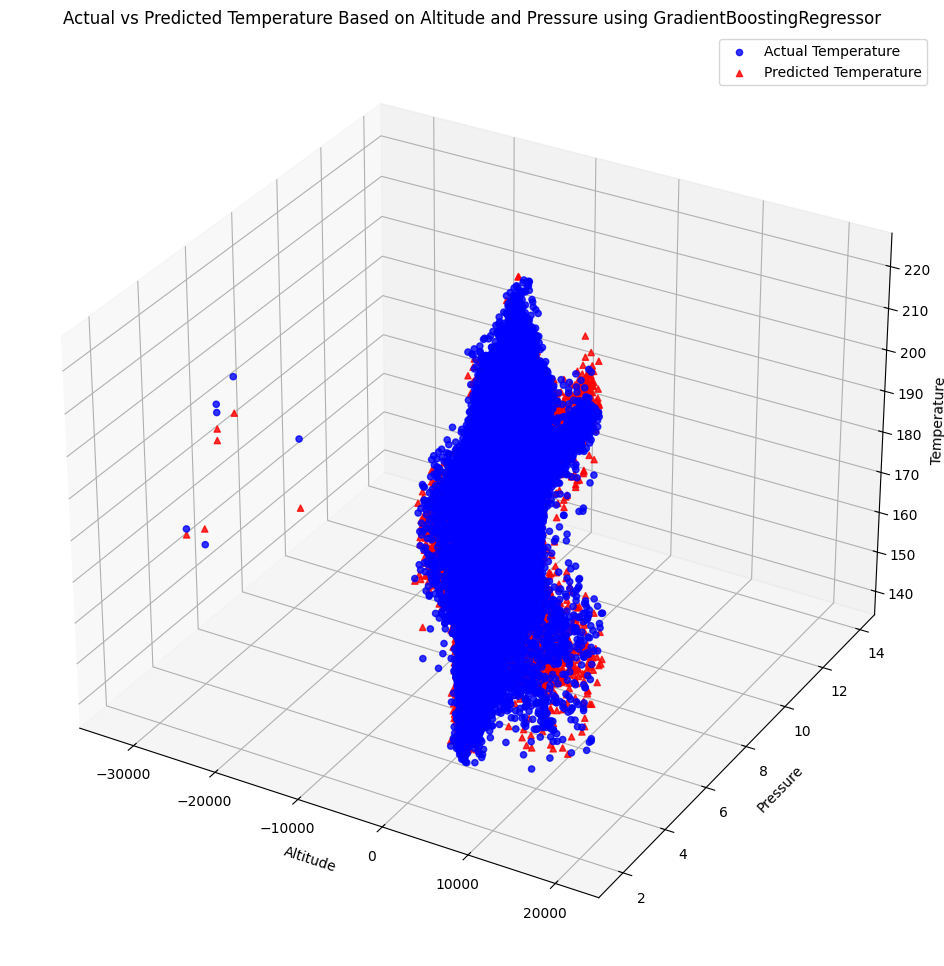

In [32]:
gbmodel = GradientBoostingRegressor(random_state=42)

start_time = time.time()
gbmodel.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

start_time = time.time()
y_pred_GBR = gbmodel.predict(x_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.4f} seconds")

gbrtimetaken = training_time + prediction_time
print(f"Total time taken: {gbrtimetaken:.4f} seconds")

gbrmse = mean_squared_error(y_test, y_pred_GBR)
print(f"GBR Mean Squared Error: {gbrmse}")

gbrrmse = np.sqrt(gbrmse)
print(f'GBR Root Mean Squared Error: {gbrrmse}')

gbrmae = mean_absolute_error(y_test, y_pred_GBR)
print(f"GBR Mean Absolute Error: {gbrmae}")

gbrr2 = r2_score(y_test, y_pred_GBR)
print(f"GBR R squared score: {gbrr2}")

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_GBR})
print(comparison.head())

fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_test['Altitude'], x_test['pres0'], y_test, color='blue', alpha=0.8, label='Actual Temperature')
ax.scatter(x_test['Altitude'], x_test['pres0'], y_pred_GBR, color='red', alpha=0.8, label='Predicted Temperature', marker='^')

ax.set_xlabel('Altitude')
ax.set_ylabel('Pressure')
ax.set_zlabel('Temperature')

ax.set_title('Actual vs Predicted Temperature Based on Altitude and Pressure using GradientBoostingRegressor')
ax.legend()

plt.show()

Training time: 22.84 seconds
Prediction time: 0.20 seconds
Total time taken: 23.0387 seconds
       Actual   Predicted
0  177.246940  181.680156
1  197.321888  196.294347
2  192.142049  188.567482
3  183.239948  185.562538
4  187.367913  174.982119
DTR Mean Squared Error: 28.21888786925289
DTR Root Mean Squared Error: 5.3121453170308595
DTR Mean Absolute Error: 3.5010095787260274
DTR R-squared: 0.7962666392184914


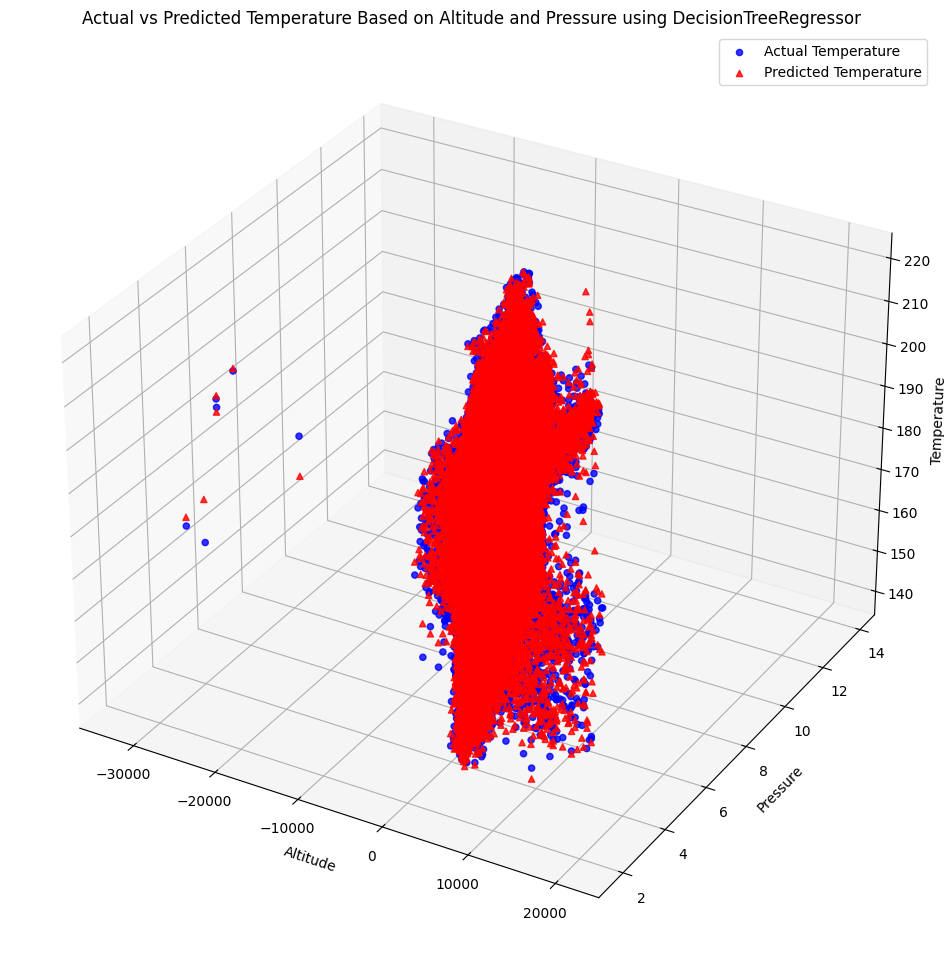

In [33]:
DTR_model = DecisionTreeRegressor(random_state = 42)

start_time = time.time()
DTR_model.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

start_time = time.time()
y_pred_DTR = DTR_model.predict(x_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.2f} seconds")

dtrtimetaken = training_time + prediction_time
print(f"Total time taken: {dtrtimetaken:.4f} seconds")

dtrmse = mean_squared_error(y_test, y_pred_DTR)
dtrrmse = np.sqrt(dtrmse)
dtrmae = mean_absolute_error(y_test, y_pred_DTR)
dtrr2 = r2_score(y_test, y_pred_DTR)

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_DTR})
print(comparison.head())

print(f"DTR Mean Squared Error: {dtrmse}")
print(f'DTR Root Mean Squared Error: {dtrrmse}')
print(f"DTR Mean Absolute Error: {dtrmae}")
print(f"DTR R-squared: {dtrr2}")

fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_test['Altitude'], x_test['pres0'], y_test, color='blue', alpha=0.8, label='Actual Temperature')
ax.scatter(x_test['Altitude'], x_test['pres0'], y_pred_DTR, color='red', alpha=0.8, label='Predicted Temperature', marker='^')

ax.set_xlabel('Altitude')
ax.set_ylabel('Pressure')
ax.set_zlabel('Temperature')

ax.set_title('Actual vs Predicted Temperature Based on Altitude and Pressure using DecisionTreeRegressor')
ax.legend()

plt.show()

Training time: 1463.24 seconds
Prediction time: 24.49 seconds
Total time taken: 1487.7313 seconds
RFR Mean Squared Error: 12.670279987254121
RFR Root Mean Squared Error: 3.5595336755330917
RFR Mean Absolute Error: 2.4484552602751863
RFR R-squared: 0.9085237258177491
       Actual   Predicted
0  177.246940  176.390907
1  197.321888  196.719046
2  192.142049  191.235133
3  183.239948  184.565882
4  187.367913  177.758253


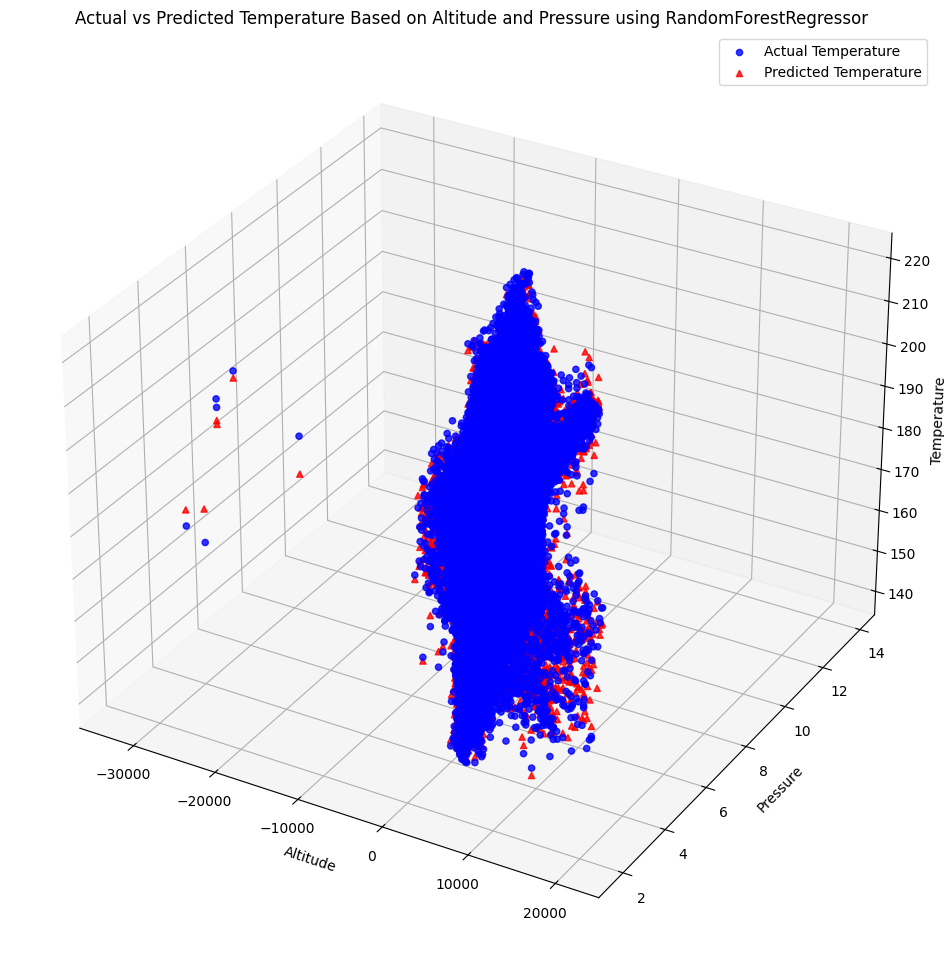

In [34]:
RFmodel = RandomForestRegressor(n_estimators=100, random_state=42)

start_time = time.time()
RFmodel.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

start_time = time.time()
y_pred_RFR = RFmodel.predict(x_test)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.2f} seconds")

rfrtimetaken = training_time + prediction_time
print(f"Total time taken: {rfrtimetaken:.4f} seconds")

rfrmse = mean_squared_error(y_test, y_pred_RFR)
print(f'RFR Mean Squared Error: {rfrmse}')

rfrrmse = np.sqrt(rfrmse)
print(f'RFR Root Mean Squared Error: {rfrrmse}')

rfrmae = mean_absolute_error(y_test, y_pred_RFR)
print(f'RFR Mean Absolute Error: {rfrmae}')

rfrr2 = r2_score(y_test, y_pred_RFR)
print(f'RFR R-squared: {rfrr2}')

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_RFR})
print(comparison.head())

fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_test['Altitude'], x_test['pres0'], y_test, color='blue', alpha=0.8, label='Actual Temperature')
ax.scatter(x_test['Altitude'], x_test['pres0'], y_pred_RFR, color='red', alpha=0.8, label='Predicted Temperature', marker='^')

ax.set_xlabel('Altitude')
ax.set_ylabel('Pressure')
ax.set_zlabel('Temperature')

ax.set_title('Actual vs Predicted Temperature Based on Altitude and Pressure using RandomForestRegressor')
ax.legend()

plt.show()

Epoch 1/50


C:\Users\Htoo Thit Sinn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15306/15306 ━━━━━━━━━━━━━━━━━━━━ 15s 862us/step - loss: 1181.8245 - val_loss: 41.9670
Epoch 2/50
15306/15306 ━━━━━━━━━━━━━━━━━━━━ 13s 851us/step - loss: 41.2505 - val_loss: 35.5813
Epoch 3/50
15306/15306 ━━━━━━━━━━━━━━━━━━━━ 20s 839us/step - loss: 35.8474 - val_loss: 33.0371
Epoch 4/50
15306/15306 ━━━━━━━━━━━━━━━━━━━━ 13s 813us/step - loss: 33.0478 - val_loss: 37.4603
Epoch 5/50
15306/15306 ━━━━━━━━━━━━━━━━━━━━ 21s 835us/step - loss: 32.7920 - val_loss: 30.1242
Epoch 6/50
15306/15306 ━━━━━━━━━━━━━━━━━━━━ 21s 845us/step - loss: 29.7926 - val_loss: 27.2554
Epoch 7/50
15306/15306 ━━━━━━━━━━━━━━━━━━━━ 20s 827us/step - loss: 28.1176 - val_loss: 27.0918
Epoch 8/50
15306/15306 ━━━━━━━━━━━━━━━━━━━━ 21s 835us/step - loss: 27.2227 - val_loss: 26.6933
Epoch 9/50
15306/15306 ━━━━━━━━━━━━━━━━━━━━ 12s 806us/step - loss: 26.7388 - val_loss: 25.9439
Epoch 10/50
15306/15306 ━━━━━━━━━━━━━━━━━━━━ 21s 841us/step - loss: 27.1760 - val_loss: 24.9918
Epoch 11/50
15306/15306 ━━━━━━━━━━━━━━━━━━━━ 20s 835us/ste

MemoryError: Unable to allocate 513. GiB for an array with shape (68845888225,) and data type int64

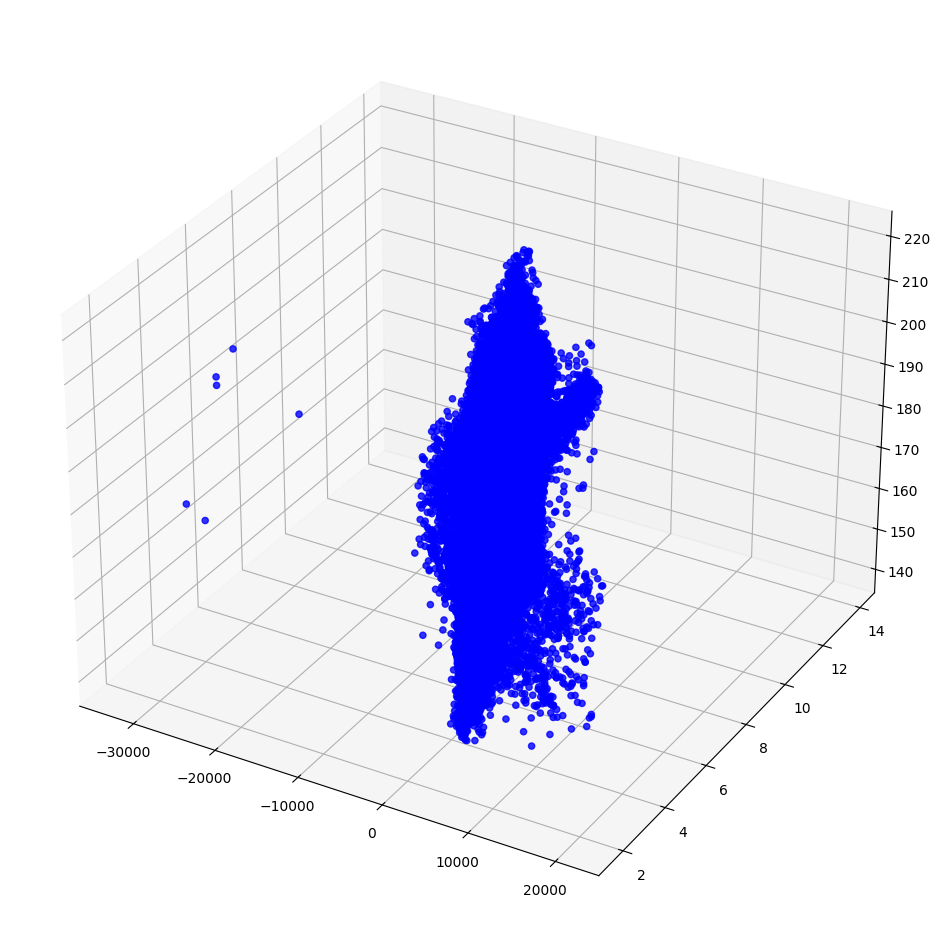

In [37]:
NNmodel = Sequential()

NNmodel.add(Dense(128, input_dim=10, activation='relu'))

NNmodel.add(Dense(64, activation='relu'))

NNmodel.add(Dense(32, activation='relu'))

NNmodel.add(Dense(1))

NNmodel.compile(optimizer='adam', loss='mean_squared_error')

start_time = time.time()
NNmodel.fit(x_train_scaled, y_train, epochs = 50, batch_size = 32, validation_split = 0.2)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

start_time = time.time()
y_pred_MLP = NNmodel.predict(x_test_scaled)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.2f} seconds")

mpltimetaken = training_time + prediction_time
print(f"Total time taken: {mpltimetaken:.4f} seconds")

mlpmse = mean_squared_error(y_test, y_pred_MLP)
print (f"NNR Mean Squared Error: {mlpmse}")

mlprmse = np.sqrt(mlpmse)
print(f'NNR Root Mean Squared Error: {mlprmse}')

mlpmae = mean_absolute_error(y_test, y_pred_MLP)
print(f'NNR Mean Absolute Error: {mlpmae}')

mlpr2 = r2_score(y_test, y_pred_MLP)
print (f"NNR R-squared: {mlpr2}")

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_MLP.flatten()})
print(comparison.head())

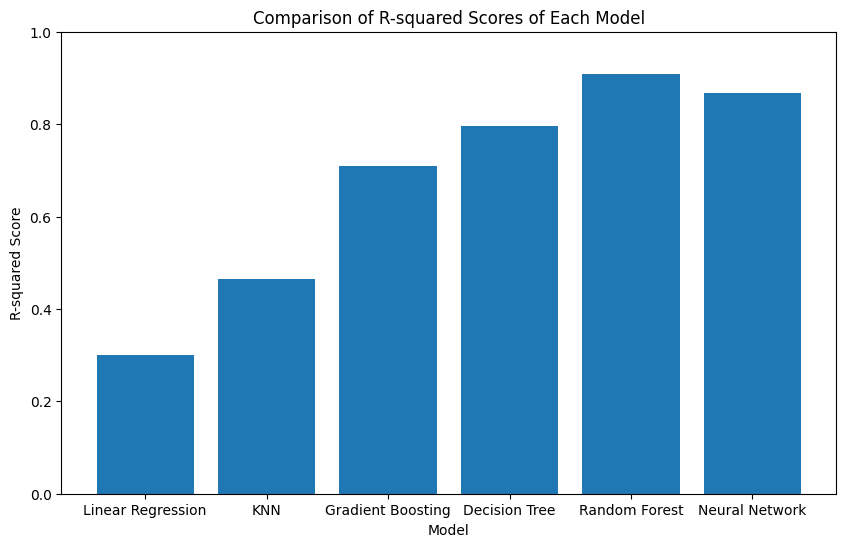

In [38]:
r2_scores = {}
r2_scores['Linear Regression'] = lrr2
r2_scores['KNN'] = knnr2
r2_scores['Gradient Boosting'] = gbrr2
r2_scores['Decision Tree'] = dtrr2
r2_scores['Random Forest'] = rfrr2
r2_scores['Neural Network'] = mlpr2

plt.figure(figsize = (10, 6))
plt.bar(r2_scores.keys(), r2_scores.values())

plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores of Each Model')
plt.ylim(0,1)
plt.show()

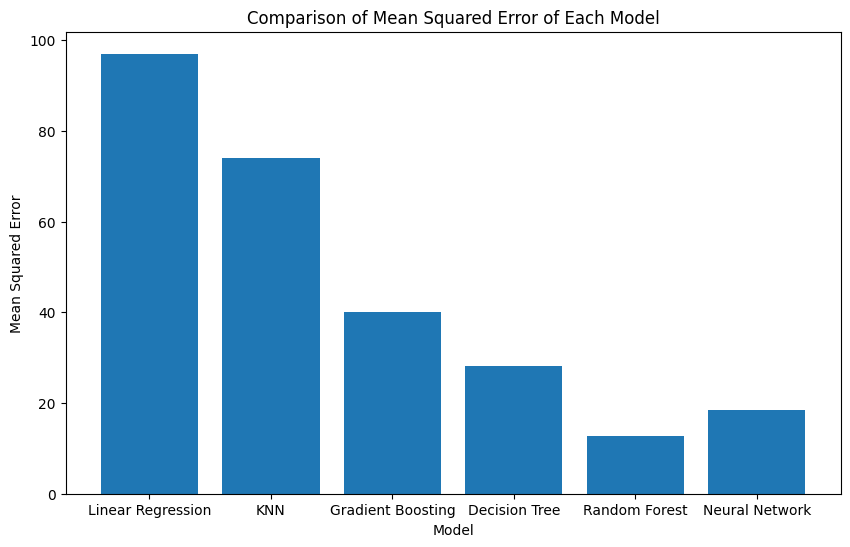

In [39]:
mse_scores = {}
mse_scores['Linear Regression'] = lrmse
mse_scores['KNN'] = knnmse
mse_scores['Gradient Boosting'] = gbrmse
mse_scores['Decision Tree'] = dtrmse
mse_scores['Random Forest'] = rfrmse
mse_scores['Neural Network'] = mlpmse

plt.figure(figsize = (10, 6))
plt.bar(mse_scores.keys(), mse_scores.values())

plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error of Each Model')
plt.show()

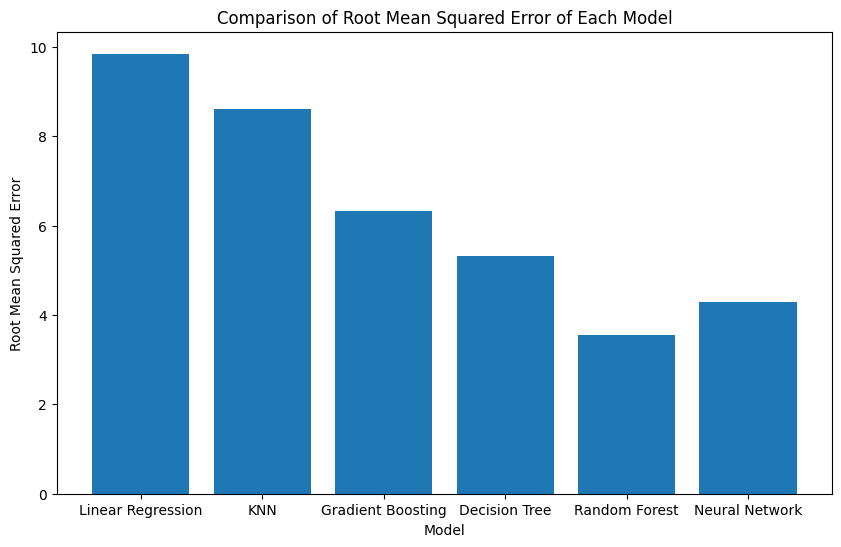

In [42]:
rmse_scores = {}
rmse_scores['Linear Regression'] = lrrmse
rmse_scores['KNN'] = knnrmse
rmse_scores['Gradient Boosting'] = gbrrmse
rmse_scores['Decision Tree'] = dtrrmse
rmse_scores['Random Forest'] = rfrrmse
rmse_scores['Neural Network'] = mlprmse

plt.figure(figsize = (10, 6))
plt.bar(rmse_scores.keys(), rmse_scores.values())

plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error')
plt.title('Comparison of Root Mean Squared Error of Each Model')
plt.show()

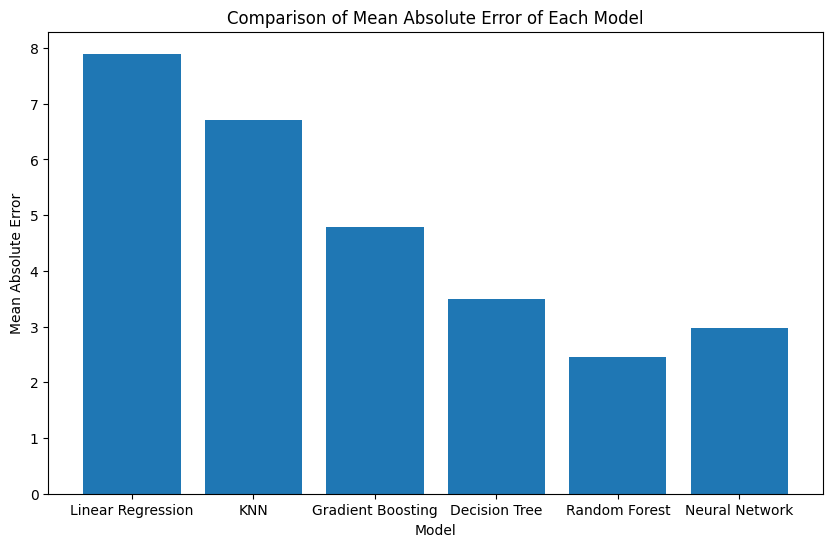

In [41]:
mae_scores = {}
mae_scores['Linear Regression'] = lrmae
mae_scores['KNN'] = knnmae
mae_scores['Gradient Boosting'] = gbrmae
mae_scores['Decision Tree'] = dtrmae
mae_scores['Random Forest'] = rfrmae
mae_scores['Neural Network'] = mlpmae

plt.figure(figsize = (10, 6))
plt.bar(mae_scores.keys(), mae_scores.values())

plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Mean Absolute Error of Each Model')
plt.show()

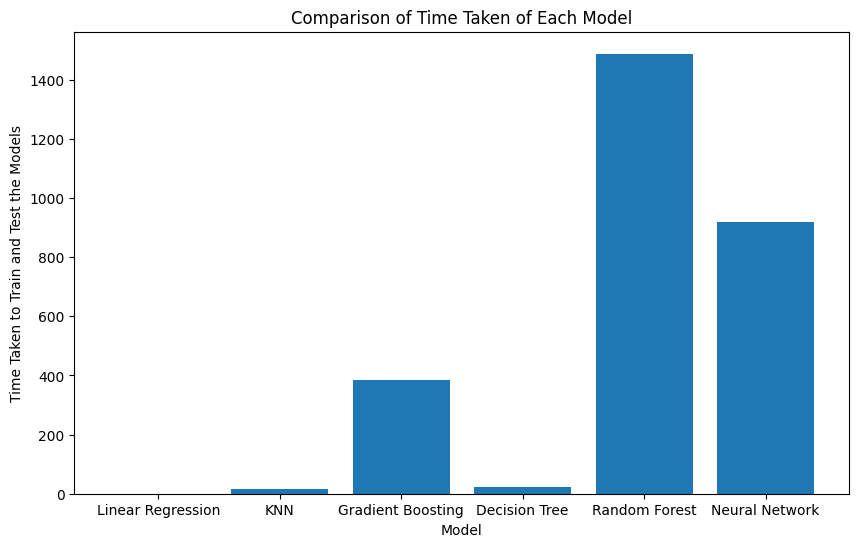

In [45]:
timetaken_scores = {}
timetaken_scores['Linear Regression'] = LRtimetaken
timetaken_scores['KNN'] = KNNtimetaken
timetaken_scores['Gradient Boosting'] = gbrtimetaken
timetaken_scores['Decision Tree'] = dtrtimetaken
timetaken_scores['Random Forest'] = rfrtimetaken
timetaken_scores['Neural Network'] = mpltimetaken

plt.figure(figsize = (10, 6))
plt.bar(timetaken_scores.keys(), timetaken_scores.values())

plt.xlabel('Model')
plt.ylabel('Time Taken to Train and Test the Models')
plt.title('Comparison of Time Taken of Each Model')
plt.show()